## Importing Libraries

In [179]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler

## Loading & Exploring the Data

In [180]:
df = pd.read_csv("stock_market.txt")

In [181]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [182]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [183]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [185]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

## Data Visualization

In [186]:
sort = df.sort_values('Date')
sort.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [187]:
sort.reset_index(inplace = True)
sort.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


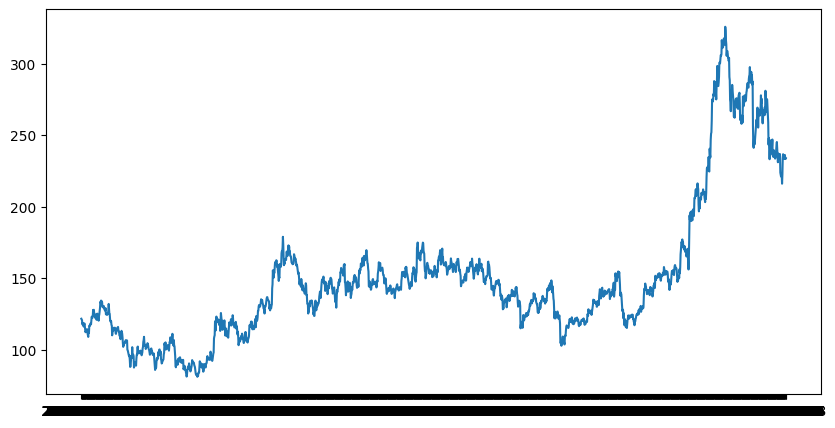

In [188]:
plt.figure(figsize = (10,5))
plt.plot(sort['Date'], sort['Close'])

## Data Preprocessing

In [189]:
close_sort = sort['Close']
close_sort

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [190]:
scaler = MinMaxScaler(feature_range = (0,1))
close_sort = scaler.fit_transform(np.array(close_sort).reshape(-1,1))
close_sort

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [191]:
train_size = int(len(close_sort)*0.70)
test_size = len(close_sort) - train_size
train_data, test_data = close_sort[0:train_size,:], close_sort[train_size:len(close_sort),:1]

In [192]:
train_data.shape

(1424, 1)

In [193]:
test_data.shape

(611, 1)

## Creating Time Series Dataset

In [194]:
def dataset_created (dataset, time_step = 1):
    data_X, data_Y = [], []
    for i in range(int(len(dataset) - time_step-1)):
        a = dataset[i:(i + time_step), 0]
        data_X.append(a)
        data_Y.append(dataset[i + time_step, 0])
    return np.array(data_X), np.array(data_Y)

In [195]:
time_step = 100
X_train, Y_train = dataset_created(train_data, time_step)
X_test, Y_test = dataset_created(test_data, time_step)

In [196]:
X_train.shape

(1323, 100)

In [197]:
Y_train.shape

(1323,)

In [198]:
X_test.shape

(510, 100)

In [199]:
Y_test.shape

(510,)

## Reshaping Data for LSTM

In [200]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [201]:
X_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.14011438],
        [0.13848039],
        [0.12479575]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.13848039],
        [0.12479575],
        [0.12254902]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.12479575],
        [0.12254902],
        [0.13010621]],

       ...,

       [[0.18280229],
        [0.19178922],
        [0.19219771],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.19178922],
        [0.19219771],
        [0.19281046],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.19219771],
        [0.19281046],
        [0.21058007],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

In [202]:
X_test

array([[[0.1621732 ],
        [0.15951797],
        [0.16707516],
        ...,
        [0.24775327],
        [0.24836601],
        [0.25020425]],

       [[0.15951797],
        [0.16707516],
        [0.15992647],
        ...,
        [0.24836601],
        [0.25020425],
        [0.25020425]],

       [[0.16707516],
        [0.15992647],
        [0.16053922],
        ...,
        [0.25020425],
        [0.25020425],
        [0.23999183]],

       ...,

       [[0.86519608],
        [0.84027778],
        [0.84497549],
        ...,
        [0.62888072],
        [0.62765523],
        [0.62234477]],

       [[0.84027778],
        [0.84497549],
        [0.87111928],
        ...,
        [0.62765523],
        [0.62234477],
        [0.63378268]],

       [[0.84497549],
        [0.87111928],
        [0.85273693],
        ...,
        [0.62234477],
        [0.63378268],
        [0.62622549]]])

In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Building and Compiling LSTM Model

In [204]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training LSTM Model

In [205]:
model.fit(X_train, Y_train, validation_split = 0.1, epochs = 50, batch_size = 64, verbose = 1)

Epoch 1/50
19/19 [==============================] - 9s 194ms/step - loss: 0.0078 - val_loss: 0.0014
Epoch 2/50
19/19 [==============================] - 3s 141ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 3/50
19/19 [==============================] - 3s 141ms/step - loss: 8.6472e-04 - val_loss: 0.0011
Epoch 4/50
19/19 [==============================] - 3s 142ms/step - loss: 7.8699e-04 - val_loss: 0.0011
Epoch 5/50
19/19 [==============================] - 3s 142ms/step - loss: 7.7285e-04 - val_loss: 9.9403e-04
Epoch 6/50
19/19 [==============================] - 3s 141ms/step - loss: 7.4303e-04 - val_loss: 9.4968e-04
Epoch 7/50
19/19 [==============================] - 3s 145ms/step - loss: 7.4009e-04 - val_loss: 9.1332e-04
Epoch 8/50
19/19 [==============================] - 3s 144ms/step - loss: 6.9451e-04 - val_loss: 9.0905e-04
Epoch 9/50
19/19 [==============================] - 3s 141ms/step - loss: 6.7403e-04 - val_loss: 7.9618e-04
Epoch 10/50
19/19 [==============================] -

## Making predictions on test and train data

In [206]:
test_predict = model.predict(X_test)
train_predict = model.predict(X_train)

42/42 [==============================] - 2s 37ms/step


In [238]:
test_predict = scaler.inverse_transform(test_predict)
train_predict = scaler.inverse_transform(train_predict)

In [239]:
test_predict

array([[35225.523],
       [35273.992],
       [35092.375],
       [34514.938],
       [34075.78 ],
       [33891.492],
       [34115.29 ],
       [34496.008],
       [34662.098],
       [34617.965],
       [34540.266],
       [34742.402],
       [34928.8  ],
       [35288.12 ],
       [35802.387],
       [35488.75 ],
       [34933.062],
       [34729.4  ],
       [34810.13 ],
       [35862.145],
       [36970.535],
       [37631.387],
       [37791.918],
       [37328.26 ],
       [37138.703],
       [37038.19 ],
       [37138.203],
       [37548.305],
       [37803.68 ],
       [37853.316],
       [37914.965],
       [37659.78 ],
       [36938.96 ],
       [35653.215],
       [34752.605],
       [34439.32 ],
       [34482.137],
       [34384.824],
       [33927.805],
       [33098.242],
       [32424.678],
       [32054.13 ],
       [31586.719],
       [31367.64 ],
       [30942.75 ],
       [30363.486],
       [30114.877],
       [29991.572],
       [30008.41 ],
       [29822.42 ],


In [240]:
train_predict

array([[28484.246],
       [28139.086],
       [27928.17 ],
       ...,
       [29761.963],
       [29573.152],
       [29416.814]], dtype=float32)

## Model Evaluation

In [241]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

33210.01190930879

In [242]:
math.sqrt(mean_squared_error(Y_test, test_predict))

51101.46852456261

## Generating Future Stock Price Predictions

In [243]:
len(test_data)

611

In [244]:
pred_input = test_data[511:].reshape(1, -1)
pred_input.shape

(1, 100)

In [245]:
temp_input = list(pred_input)
temp_input = temp_input[0].tolist()
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [246]:
import numpy as np

lst_output = []
n_steps = 100
i = 0
while i < 20:  # For 20 days 
    if (len(temp_input) >100):
        pred_input = np.array(temp_input[1:])  # Convert to a numeric NumPy array
        print("{} day input {}".format(i,pred_input))
        pred_input = pred_input.reshape((1,-1))
        pred_input = pred_input.reshape((1, n_steps, 1))

        get = model.predict(pred_input, verbose=0)
        print("{} day output".format(i, get))
        temp_input.extend(get[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(get.tolist())
        i = i + 1
    else:
        # You need to define how to initialize pred_input in the else block based on your specific use case
        
       
        pred_input = pred_input.reshape((1, n_steps, 1))
        get = model.predict(pred_input, verbose=0)
        print(get[0])
        temp_input.extend(get[0].tolist())
        print(len(temp_input))
        lst_output.extend(get.tolist())
        i = i + 1

print(lst_output)

[0.6041722]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

8 day output
9 day input [0.66421569 0.67892157 0.69138072 0.70894608 0.72263072 0.73406863
 0.72120098 0.74979575 0.7689951  0.74468954 0.7120098  0.74673203
 0.75490196 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908
 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046
 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784
 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869 0.79370915
 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 0.62234477 0.6

16 day output
17 day input [0.7689951  0.74468954 0.7120098  0.74673203 0.75490196 0.76041667
 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575
 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575
 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771
 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608
 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157
 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588
 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935
 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974 0.63623366
 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484
 0.57883987 0.625      0.63582516 0.62949346 0.62888072 0.62765523
 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301 0.60417223
 0.59309644 0.57927144 0.56671023 0

## Visualizing Future Stock Price Predictions

In [250]:
day_new = np.arange(1,101)
day_pred = np.arange(101,121)

In [251]:
len(close_sort)

2035

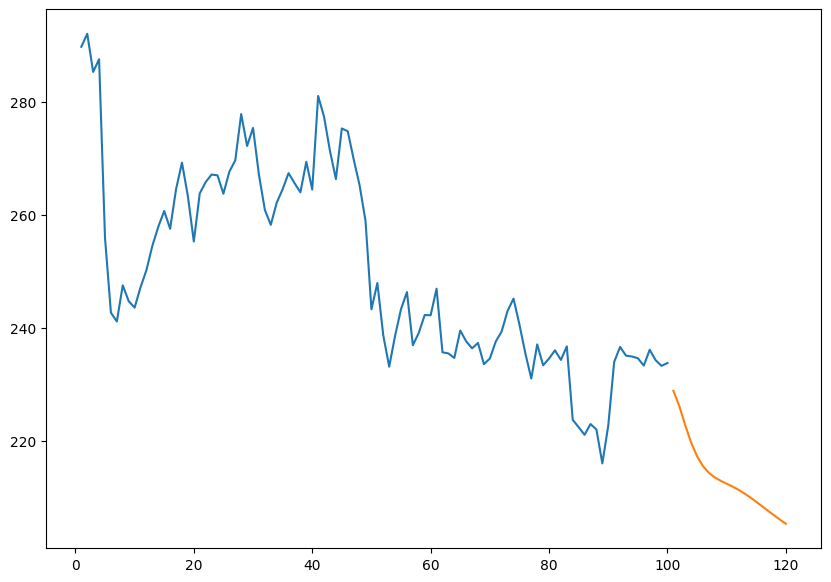

In [262]:
plt.figure(figsize = (10,7))
plt.plot(day_new, scaler.inverse_transform(close_sort[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

In [253]:
df3 = close_sort.tolist()
df3.extend(lst_output)

In [254]:
print(len(df3))

2055


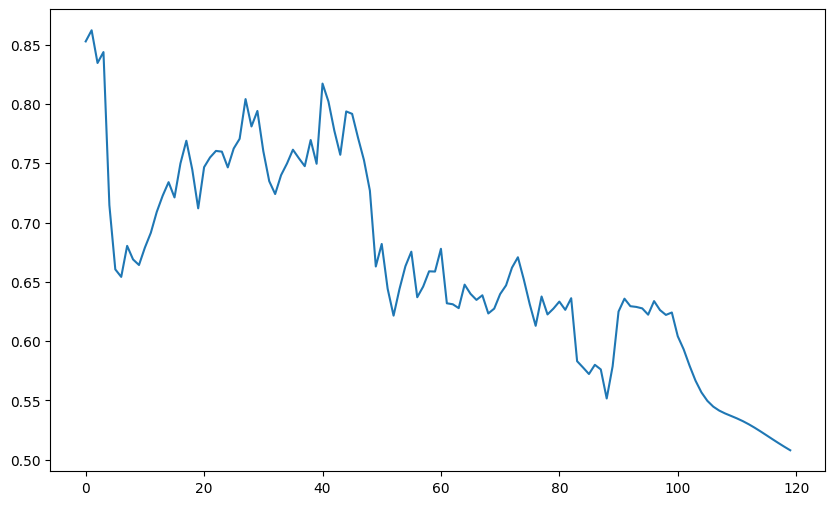

In [255]:
plt.figure(figsize = (10,6))
plt.plot(df3[1935:])

In [257]:
df3 = scaler.inverse_transform(df3).tolist()

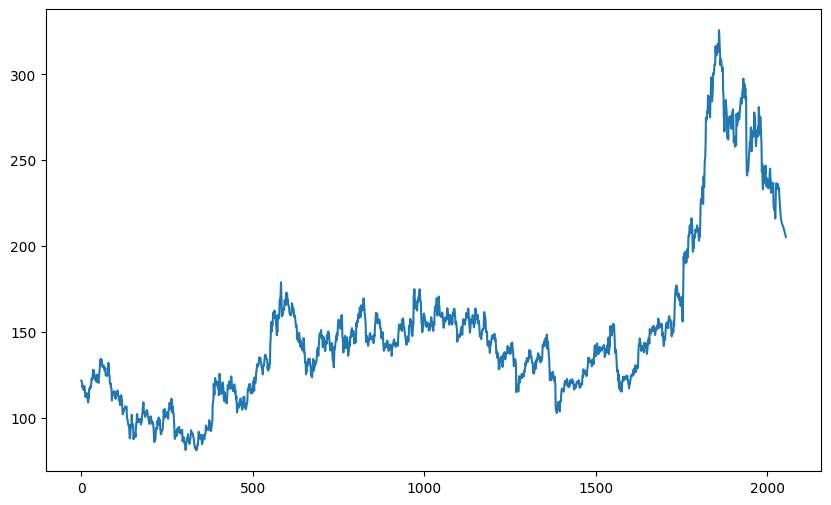

In [258]:
plt.figure(figsize = (10,6))
plt.plot(df3)